# Experiments

This notebook is to record various experiments carried out in the assignment. Four experiments are performed and each experiment is different from the others in terms of streaming and buffering configurations of the Shaka Player's buffering system.  These configurations are set on the shaka players configuration. These configurations are applief while initialization of the player.

# Following are the system configurations

In [1]:
# What version of Python do you have?
import sys

import pandas as pd
import matplotlib
import seaborn as sns

print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"matplotlib {matplotlib.__version__}")
print(f"seaborn {sns.__version__}")

Python 3.7.6 (default, Jan  8 2020, 13:42:34) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
Pandas 1.0.1
matplotlib 3.2.1
seaborn 0.10.0


# Experiment 1

 Following are the streaming configurations. All of the following are expressed in seconds.
 
 1. bufferingGoal:30
 2. rebufferingGoal:20
 3. bufferBehind :10

### Stats from the player

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./experiments/experiment-1_basic.csv", header=0, delimiter=',')
## bandwidth is in bits per second. It is scaled to megabytes
df['estimatedBandwidth'] = df['estimatedBandwidth']/1000000 

df.head(15)

,timestamp,width,height,streamBandwidth,estimatedBandwidth,loadLatency,manifestTimeSeconds,playTime,pauseTime,bufferingTime
0,1.587245e+09,1280,720,1761659,5.300000,NaN,0.035,0.000,0.000,0.039
1,1.587245e+09,1280,720,1761659,398.824235,NaN,0.035,0.000,0.000,0.060
2,1.587245e+09,1920,1080,115176034,423.112249,NaN,0.035,0.000,0.000,0.105
3,1.587245e+09,1920,1080,115176034,423.112249,0.283,0.035,0.000,0.000,0.126
4,1.587245e+09,1920,1080,115176034,451.939810,0.283,0.035,0.000,0.000,0.138
5,1.587245e+09,1920,1080,115176034,526.739419,0.283,0.035,0.000,0.000,0.171
6,1.587245e+09,1920,1080,115176034,592.582391,0.283,0.035,0.000,0.031,0.178
7,1.587245e+09,1920,1080,115176034,634.012759,0.283,0.035,0.000,0.078,0.178
8,1.587245e+09,1920,1080,115176034,576.000348,0.283,0.035,6.253,8.964,0.178
9,1.587245e+09,1920,1080,115176034,570.673394,0.283,0.035,12.301,8.964,0.178


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./experiments/experiment-1_basic.csv", header=0, delimiter=',')
## bandwidth is in bits per second. It is scaled to megabytes
df['estimatedBandwidth'] = df['estimatedBandwidth']/1000000 

df.describe()

,timestamp,width,height,streamBandwidth,estimatedBandwidth,loadLatency,manifestTimeSeconds,playTime,pauseTime,bufferingTime
count,3.700000e+01,37.000000,37.000000,3.700000e+01,37.000000,34.000,37.000,37.000000,37.000000,37.000000
mean,1.587245e+09,1176.216216,661.621622,3.492460e+07,149.579049,0.283,0.035,67.517081,7.028784,29.852189
std,7.837728e+01,522.851962,294.104229,5.292037e+07,231.309564,0.000,0.000,51.331543,3.735386,25.914954
min,1.587245e+09,640.000000,360.000000,3.808900e+05,0.389184,0.283,0.035,0.000000,0.000000,0.039000
25%,1.587245e+09,640.000000,360.000000,8.004940e+05,1.164587,0.283,0.035,12.301000,8.964000,0.178000
50%,1.587245e+09,960.000000,540.000000,1.131655e+06,1.403481,0.283,0.035,65.715000,8.964000,53.764000
75%,1.587245e+09,1920.000000,1080.000000,1.151760e+08,398.824235,0.283,0.035,108.897000,8.964000,53.768000
max,1.587245e+09,1920.000000,1080.000000,1.151760e+08,634.012759,0.283,0.035,150.409000,8.964000,53.768000


### Estimated bandwidth and buffering time.

Following plot is to monitor changes in bandwidth and buffering time as the video plays. With the above settings set on the Shaka Player's buffering system, network/bandwidth was trottled and stats were collected. Stats were collected for every network request and stored in a csv file.

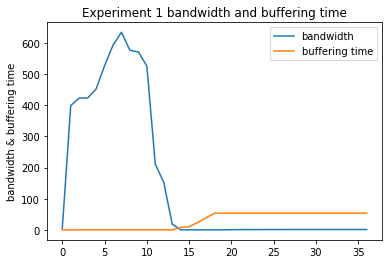

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./experiments/experiment-1_basic.csv", header=0, delimiter=',')
## bandwidth is in bits per second. It is scaled to megabytes
df['estimatedBandwidth'] = df['estimatedBandwidth']/1000000 
plt.title(label="Experiment 1 bandwidth and buffering time", loc="center")
plt.plot(df['estimatedBandwidth'], label='bandwidth')
plt.plot(df['bufferingTime'], label='buffering time')
plt.ylabel('bandwidth & buffering time')
plt.legend()

### Stalled time

Following plot is to monitor stalled time as the video plays. Stalled time is calculated as the difference between the current buffering time and previous buffering time. Since the buffering times are in seconds. Stalled time is also in ***seconds***.

Text(0.5, 1.0, 'Experiment 1 Stalled time')

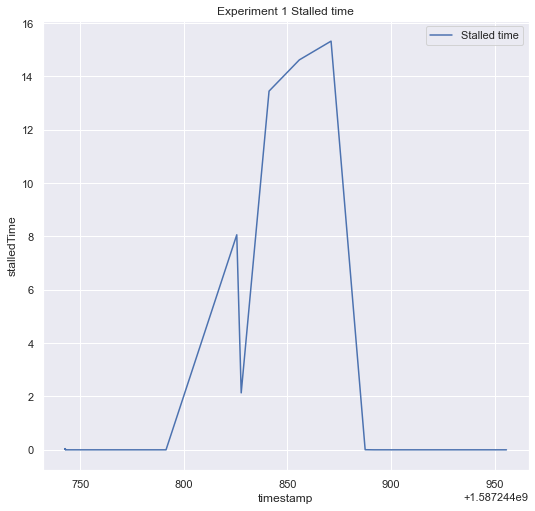

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./experiments/experiment-1_basic.csv", header=0, delimiter=',')
### Stalled time is difference between the current buffering time and previous buffering time.
stalledtime = []
stalledtime.append(df['bufferingTime'][0])
for i in range(1, len(df['bufferingTime'][0:])):
    stalledtime.append(df['bufferingTime'][i] - df['bufferingTime'][i - 1])
df['stalledTime'] = stalledtime
df['estimatedBandwidth'] = df['estimatedBandwidth']/1000000

sns.set(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(8.7,8.27)})
sns.lineplot(x="timestamp", y="stalledTime", label='Stalled time', data=df).set_title('Experiment 1 Stalled time')

# Experiment 2

Following are the streaming configurations. All of the following are expressed in seconds.

1. bufferingGoal:60
2. rebufferingGoal:20
3. bufferBehind :20

### Estimated bandwidth and buffering time

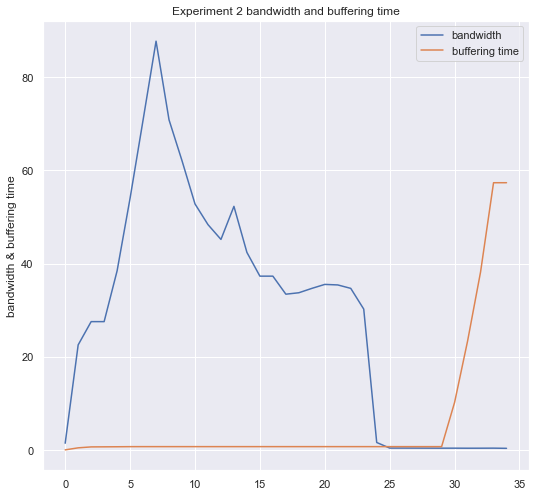

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./experiments/experiment-2_basic.csv", header=0, delimiter=',')
## bandwidth is in bits per second. It is scaled to megabytes
df['estimatedBandwidth'] = df['estimatedBandwidth']/1000000 
plt.title(label="Experiment 2 bandwidth and buffering time", loc="center")
plt.plot(df['estimatedBandwidth'], label='bandwidth')
plt.plot(df['bufferingTime'], label='buffering time')
plt.ylabel('bandwidth & buffering time')
plt.legend()

### Stalled time

Text(0.5, 1.0, 'Experiment 2 Stalled time')

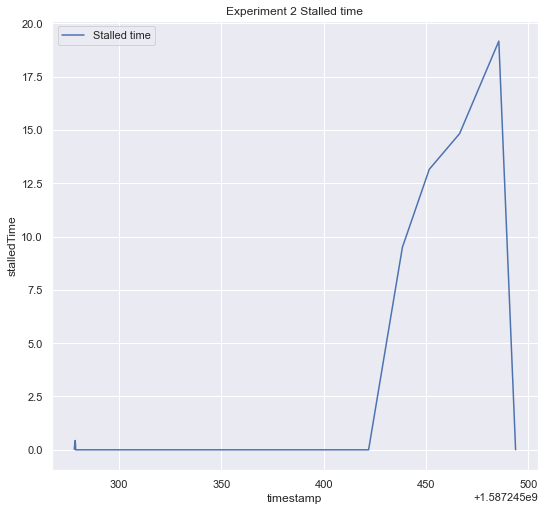

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./experiments/experiment-2_basic.csv", header=0, delimiter=',')
### Stalled time is difference between the current buffering time and previous buffering time.
stalledtime = []
stalledtime.append(df['bufferingTime'][0])
for i in range(1, len(df['bufferingTime'][0:])):
    stalledtime.append(df['bufferingTime'][i] - df['bufferingTime'][i - 1])
df['stalledTime'] = stalledtime
df['estimatedBandwidth'] = df['estimatedBandwidth']/1000000

sns.set(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(8.7,8.27)})
sns.lineplot(x="timestamp", y="stalledTime", label='Stalled time', data=df).set_title('Experiment 2 Stalled time')

# Experiment 3

Following are the streaming configurations. All of the following are expressed in seconds.

1. bufferingGoal:80
2. rebufferingGoal:30
3. bufferBehind :20

### Estimated bandwidth and buffering time

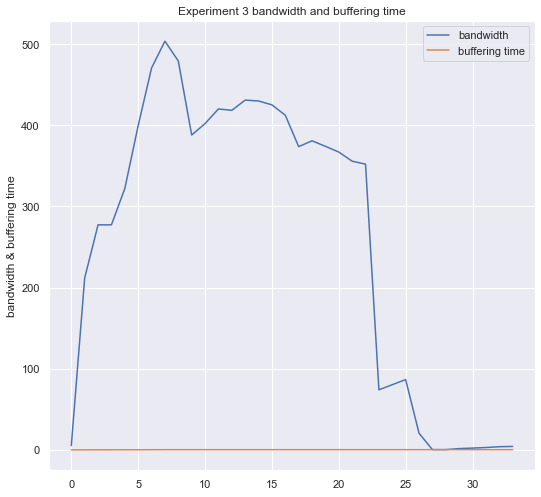

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./experiments/experiment-3_basic.csv", header=0, delimiter=',')
## bandwidth is in bits per second. It is scaled to megabytes
df['estimatedBandwidth'] = df['estimatedBandwidth']/1000000 
plt.title(label="Experiment 3 bandwidth and buffering time", loc="center")
plt.plot(df['estimatedBandwidth'], label='bandwidth')
plt.plot(df['bufferingTime'], label='buffering time')
plt.ylabel('bandwidth & buffering time')
plt.legend()

### Stalled time

Text(0.5, 1.0, 'Experiment 3 Stalled time')

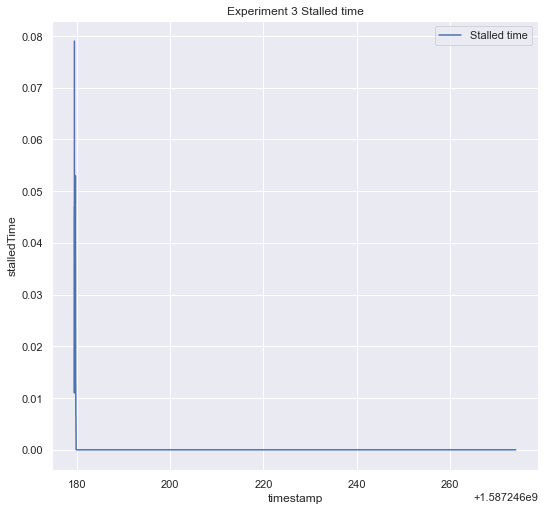

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./experiments/experiment-3_basic.csv", header=0, delimiter=',')
### Stalled time is difference between the current buffering time and previous buffering time.
stalledtime = []
stalledtime.append(df['bufferingTime'][0])
for i in range(1, len(df['bufferingTime'][0:])):
    stalledtime.append(df['bufferingTime'][i] - df['bufferingTime'][i - 1])
df['stalledTime'] = stalledtime
df['estimatedBandwidth'] = df['estimatedBandwidth']/1000000

sns.set(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(8.7,8.27)})
sns.lineplot(x="timestamp", y="stalledTime", label='Stalled time', data=df).set_title('Experiment 3 Stalled time')

# Experiment 4

Following are the streaming configurations. All of the following are expressed in seconds.
1. bufferingGoal:70
2. rebufferingGoal:20
3. bufferBehind :20

### Estimated bandwidth and buffering time

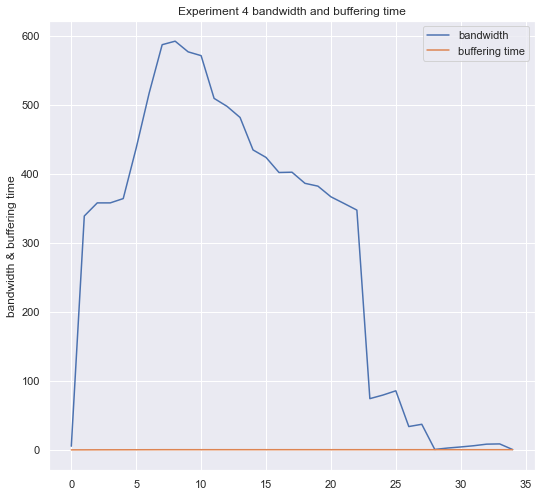

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./experiments/experiment-4_basic.csv", header=0, delimiter=',')
## bandwidth is in bits per second. It is scaled to megabytes
df['estimatedBandwidth'] = df['estimatedBandwidth']/1000000 
plt.title(label="Experiment 4 bandwidth and buffering time", loc="center")
plt.plot(df['estimatedBandwidth'], label='bandwidth')
plt.plot(df['bufferingTime'], label='buffering time')
plt.ylabel('bandwidth & buffering time')
plt.legend()

### Stalled time

Text(0.5, 1.0, 'Experiment 4 Stalled time')

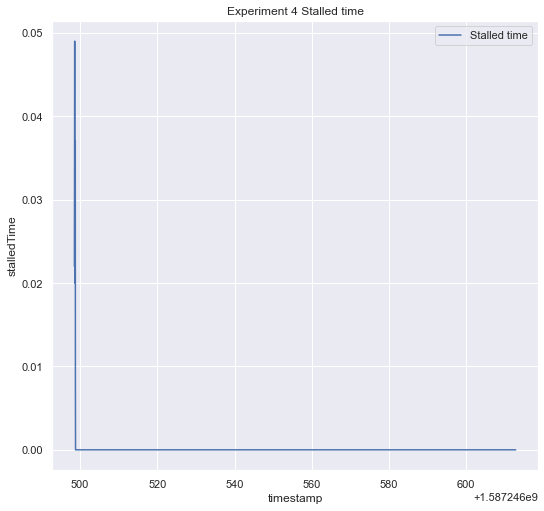

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("./experiments/experiment-4_basic.csv", header=0, delimiter=',')
### Stalled time is difference between the current buffering time and previous buffering time.
stalledtime = []
stalledtime.append(df['bufferingTime'][0])
for i in range(1, len(df['bufferingTime'][0:])):
    stalledtime.append(df['bufferingTime'][i] - df['bufferingTime'][i - 1])
df['stalledTime'] = stalledtime
df['estimatedBandwidth'] = df['estimatedBandwidth']/1000000

sns.set(style="ticks", color_codes=True)
sns.set(rc={'figure.figsize':(8.7,8.27)})
sns.lineplot(x="timestamp", y="stalledTime", label='Stalled time', data=df).set_title('Experiment 4 Stalled time')